In [1]:
from transformers import AutoModel
import torch
from huggingface_hub import get_full_repo_name
import os

# Get the repository name
repo_id = "jinaai/jina-embeddings-v4"

# Initialize the model
model = AutoModel.from_pretrained(repo_id, trust_remote_code=True, dtype = torch.float16)

# Handle no cuda present
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

`torch_dtype` is deprecated! Use `dtype` instead!


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

PeftModelForFeatureExtraction(
  (base_model): LoraModel(
    (model): JinaEmbeddingsV4Model(
      (model): Qwen2_5_VLModel(
        (visual): Qwen2_5_VisionTransformerPretrainedModel(
          (patch_embed): Qwen2_5_VisionPatchEmbed(
            (proj): Conv3d(3, 1280, kernel_size=(2, 14, 14), stride=(2, 14, 14), bias=False)
          )
          (rotary_pos_emb): Qwen2_5_VisionRotaryEmbedding()
          (blocks): ModuleList(
            (0-31): 32 x Qwen2_5_VLVisionBlock(
              (norm1): Qwen2RMSNorm((1280,), eps=1e-06)
              (norm2): Qwen2RMSNorm((1280,), eps=1e-06)
              (attn): Qwen2_5_VLVisionSdpaAttention(
                (qkv): Linear(in_features=1280, out_features=3840, bias=True)
                (proj): Linear(in_features=1280, out_features=1280, bias=True)
              )
              (mlp): Qwen2_5_VLMLP(
                (gate_proj): Linear(in_features=1280, out_features=3420, bias=True)
                (up_proj): Linear(in_features=1280, out_feat

In [2]:
import numpy as np
from transformers import AutoModel
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt


texts = [
    "Hoa màu tím với bình"
]

image_urls = [
    "https://asset.bloomnation.com/c_pad,d_vendor:global:catalog:product:image.png,f_auto,fl_preserve_transparency,q_auto/v1651296245/vendor/5714/catalog/product/b/8/b8e03feff1e29e2250cd2478a4e74037_5e39d68315e96_5e39d684e7c27.jpg",  # Star Wars lightsaber duel
    "https://img.freepik.com/free-photo/vase-with-tulips-roses_23-2148860050.jpg?semt=ais_hybrid&w=740&q=80",  # Matrix code rain
    "https://images.unsplash.com/photo-1595919303535-4481e02aad66?fm=jpg&q=60&w=3000&ixlib=rb-4.1.0&ixid=M3wxMjA3fDB8MHxzZWFyY2h8Mnx8Zmxvd2VycyUyMGluJTIwdmFzZXxlbnwwfHwwfHx8MA%3D%3D",  # Blade Runner cityscape
    "https://www.dutchgrown.com/cdn/shop/files/TallBallVaseHeinen2.jpg?v=1683988215"
]


In [3]:
# Encode text for retrieval
text_embeddings = model.encode_text(
    texts=texts,
    task="retrieval",
    prompt_name="query",
    return_numpy=True
)

# Encode images for retrieval
image_embeddings = model.encode_image(
    images=image_urls,
    task="retrieval",
    return_numpy=True
)


Encoding images...: 100%|██████████| 1/1 [03:44<00:00, 224.68s/it]


(1, 2048)
(4, 2048)
Similarity Scores (Text vs. Images):

Quote: Hoa màu tím với bình
  Image 1 (https://asset.bloomnation.com/c_pad,d_vendor:global:catalog:product:image.png,f_auto,fl_preserve_transparency,q_auto/v1651296245/vendor/5714/catalog/product/b/8/b8e03feff1e29e2250cd2478a4e74037_5e39d68315e96_5e39d684e7c27.jpg): 0.5878
  Image 2 (https://img.freepik.com/free-photo/vase-with-tulips-roses_23-2148860050.jpg?semt=ais_hybrid&w=740&q=80): 0.5987
  Image 3 (https://images.unsplash.com/photo-1595919303535-4481e02aad66?fm=jpg&q=60&w=3000&ixlib=rb-4.1.0&ixid=M3wxMjA3fDB8MHxzZWFyY2h8Mnx8Zmxvd2VycyUyMGluJTIwdmFzZXxlbnwwfHwwfHx8MA%3D%3D): 0.5228
  Image 4 (https://www.dutchgrown.com/cdn/shop/files/TallBallVaseHeinen2.jpg?v=1683988215): 0.5417


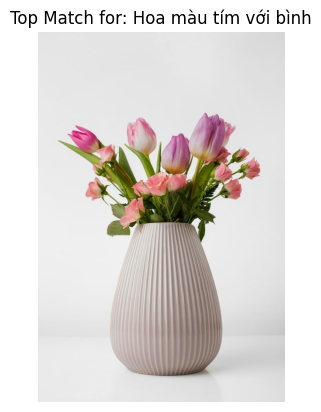

In [6]:
def cosine_similarity(a, b):
    a = np.array(a)
    b = np.array(b)
    return np.dot(a, b.T) / (np.linalg.norm(a, axis=1)[:, None] * np.linalg.norm(b, axis=1))

similarities = cosine_similarity(text_embeddings, image_embeddings)

print(text_embeddings.shape)
print(image_embeddings.shape)

# Display results
print("Similarity Scores (Text vs. Images):")
for i, text in enumerate(texts):
    print(f"\nQuote: {text}")
    for j, url in enumerate(image_urls):
        print(f"  Image {j+1} ({url}): {similarities[i][j]:.4f}")

# Visualize top match for first quote
top_image_idx = np.argmax(similarities[0])
response = requests.get(image_urls[top_image_idx])
img = Image.open(BytesIO(response.content))
plt.imshow(img)
plt.title(f"Top Match for: {texts[0]}")
plt.axis("off")
plt.show()

In [5]:
code_snippets = [
    """
def calculate_fibonacci(n):
    a, b = 0, 1
    for _ in range(n):
        yield a
        a, b = b, a + b
    """,
    """
import numpy as np
def mean_absolute_error(y_true, y_pred):
    return np.mean(np.abs(np.array(y_true) - np.array(y_pred)))
    """,
    """
import json
def save_to_json(data, filename):
    with open(filename, 'w') as f:
        json.dump(data, f, indent=4)
    """
]

# --- Multilingual "Developer" Queries ---
dev_queries = [
    "une fonction pour sauvegarder des données dans un fichier json", # French: a function to save data to a json file
    "計算フィボナッチ数列の関数", # Japanese: function to calculate the Fibonacci sequence
    "функция для вычисления средней абсолютной ошибки", # Russian: function to calculate mean absolute error
    "eine Funktion, die eine Sequenz von Fibonacci-Zahlen erzeugt" # German: a function that generates a sequence of Fibonacci numbers
]


# Here, we treat code as text, but the principle is the same.
code_embeddings = model.encode_text(texts=code_snippets, task="retrieval", return_numpy=True)
query_embeddings = model.encode_text(texts=dev_queries, task="retrieval", prompt_name="query", return_numpy=True)

# Compute cosine similarity between text and image embeddings
def cosine_similarity(a, b):
    a = np.array(a)
    b = np.array(b)
    return np.dot(a, b.T) / (np.linalg.norm(a, axis=1)[:, None] * np.linalg.norm(b, axis=1))

similarities = cosine_similarity(query_embeddings, code_embeddings)


print(query_embeddings)

Encoding texts...: 100%|██████████| 1/1 [00:01<00:00,  1.64s/it]

[[-0.00342139 -0.01799276 -0.00436192 ...  0.00980147 -0.01329044
   0.05684331]
 [-0.00502323 -0.00252761 -0.01458478 ... -0.02977946 -0.01500699
   0.04303169]
 [-0.01884139 -0.03300825  0.01003328 ... -0.03816155 -0.0052313
   0.02378964]
 [-0.01294613 -0.01322195 -0.04402979 ... -0.01051853 -0.02222393
   0.03946156]]
